# Exercícios - Regressão Linear

In [1]:
# Imports utilizados em todos os exercícios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

### Questão 1:

O arquivo Fish.csv consiste em um dataset com registro de características de 7 espécies diferentes de peixes comuns nas vendas do mercado de peixes. Com este conjunto de dados, crie um modelo de Regressão Linear para estimar o peso (Weight) dos peixes.

### Resolução:

In [2]:
# Carrega a base de dados sobre os peixes
fish = pd.read_csv('./Fish.csv')

In [3]:
# Plot das primeiras linhas do dataset
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Vamos dar uma olhada na separação das espécies dos peixes
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

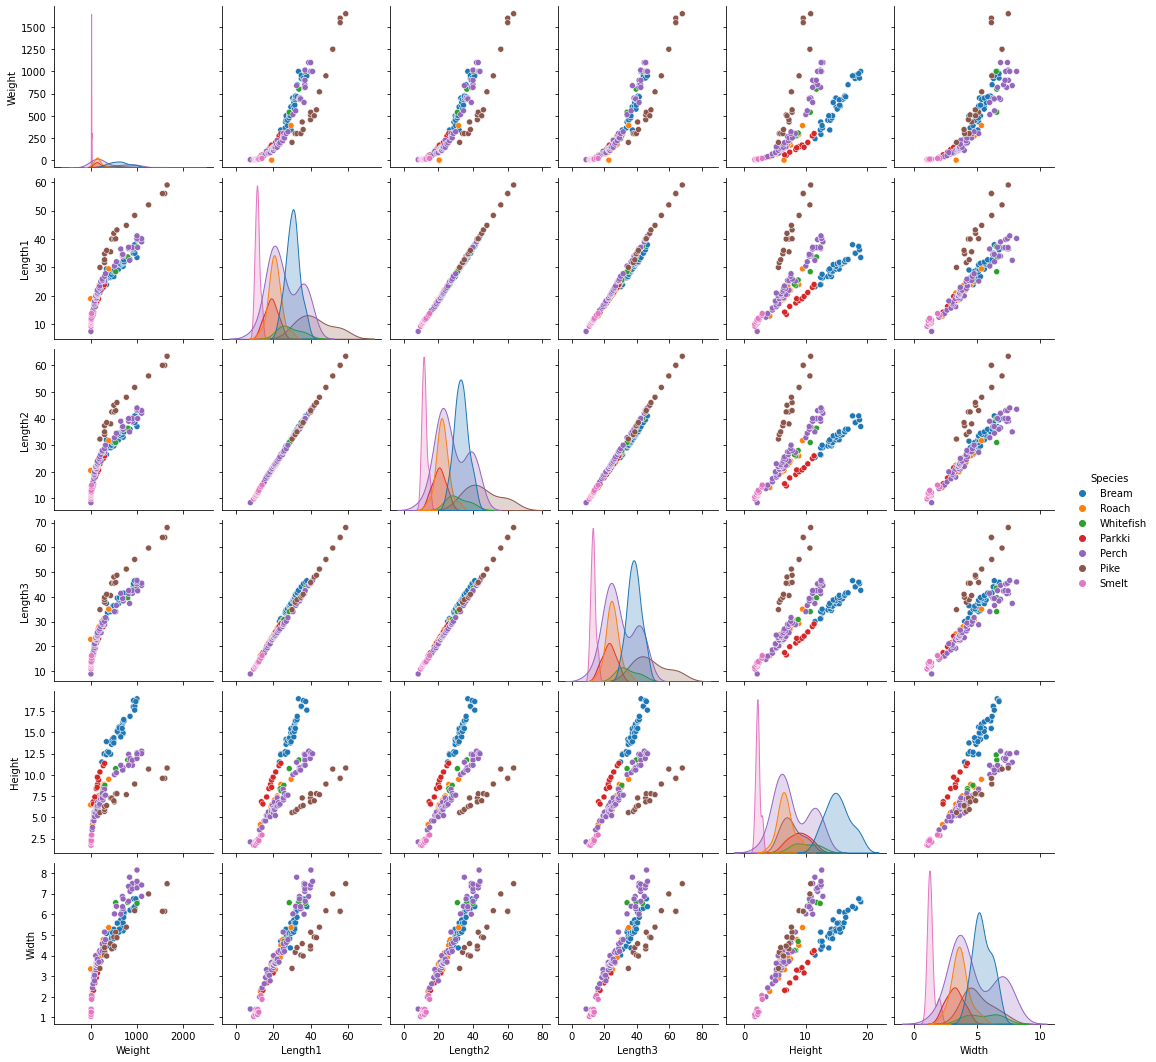

In [5]:
# Cria um pairplot separado pelas espécies
sns.pairplot(fish, hue = 'Species')

# Mostra o gráfico
plt.show()

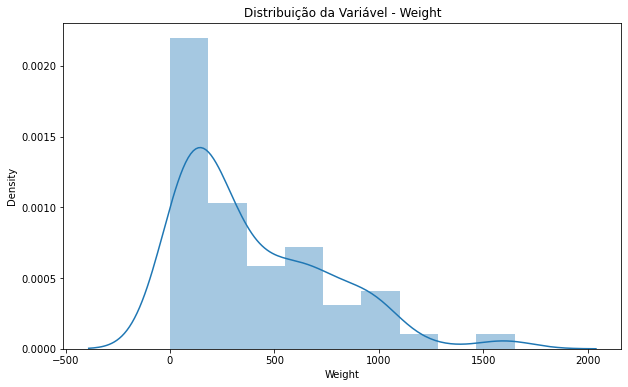

In [6]:
# Determina o tamanho do gráfico
plt.figure(figsize=(10,6))

# Plota a distribuição da Variável Resposta - Weight
sns.distplot(fish["Weight"], kde=True)

# cria um titulo para o gráfico
plt.title('Distribuição da Variável - Weight')

# Mostra o gráfico
plt.show()

In [7]:
# Aplica o get_dummies para colunar a variável Species
fish_dummies = pd.get_dummies(fish, 
                              prefix_sep = '_', 
                              columns = ['Species'], 
                              drop_first = True)

In [8]:
# Plot das primeiras linhas
fish_dummies.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [9]:
# Separação da base em variaveis e resposta
X = fish_dummies.drop(['Weight'], axis = 1)
y = fish_dummies['Weight']

In [10]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [11]:
# Define como será feito a normalização
scaler = StandardScaler()

In [12]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [14]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [15]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [16]:
# Visualizando as predições
y_pred

array([ 2.47487698e+01,  1.09402240e+00,  2.08528675e+02,  3.34301873e+02,
        2.15618301e+02,  7.53638686e+02, -7.23796069e+01,  2.53789788e+02,
        2.59042883e+02,  1.18508710e+03,  5.99786091e+02,  8.48889835e+02,
        5.37109490e+02,  1.51879743e+02,  6.79396783e+02,  8.18651009e+02,
        1.01616178e+03,  2.80995744e+02,  2.21668405e+02,  5.81879710e+02,
       -2.61681995e+01,  5.81025375e+02,  5.08531313e+02,  4.81247173e+02,
        8.14878305e+02,  9.62624741e+02,  2.18856937e+02,  3.58817006e+02,
       -1.02438789e+02, -2.73393245e+01,  5.98433080e+02, -1.79930591e+01,
       -1.04461162e+02,  7.27942811e+02,  3.57861473e+02,  1.63980275e+02,
        1.88750897e+02,  1.10520877e+02,  2.05361311e+02,  7.75785213e+02,
        6.78075240e+02,  7.28118158e+02, -7.65963299e+01,  1.78606950e+02,
        1.92834912e+02,  6.73650079e+00,  1.35564713e+02,  6.52818514e+02])

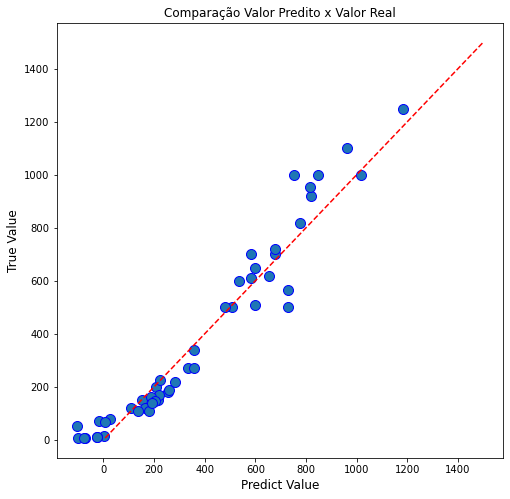

In [17]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [18]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    68.257
Erro Quadrãtico Médio:  7595.582
R^2:                    0.938


In [19]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,Length2,862.799106
1,Length3,335.811756
2,Species_Smelt,72.669095
3,Species_Parkki,33.386337
4,Width,16.348687
5,Species_Perch,11.088427
6,Species_Whitefish,1.549458
7,Species_Roach,0.439158
8,Height,-59.674151
9,Species_Pike,-113.023189


## 

### Questão 2

Carregue os dados contidos no arquivo who-life-expectancy-2015.csv, o qual contém diversas indicadores de diferentes países para o ano de 2015. Seu objetivo é criar um modelo de Regressão Linear capaz de estimar a expectativa de vida da população dos diferentes países de acordo com os indicadores mostrados no dataset.

### Resolução:

In [20]:
# carrega a base de dados
wle = pd.read_csv('./who-life-expectancy-2015.csv', index_col = 0)

In [21]:
# Print dos 5 primeiras linhas
wle.head()

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [22]:
# Verifica as dimensões do shape
wle.shape

(183, 20)

In [23]:
# Verifica a quantidade de valores nulos por coluna
(wle.isna().sum()/len(wle))*100

Country                             0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                            96.721311
percentage expenditure              0.000000
Hepatitis B                         4.918033
Measles                             0.000000
 BMI                                1.092896
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                  98.907104
Diphtheria                          0.000000
 HIV/AIDS                           0.000000
GDP                                15.846995
Population                         22.404372
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: float64

In [24]:
# Drop das Colunas com maior parte dos dados nulos
wle.drop(['Alcohol', 'Total expenditure'], axis = 1, inplace = True)

In [25]:
# Verifica as dimensões após o drop
wle.shape

(183, 18)

In [26]:
# Exclui todas as linhas nulas agora
wle.dropna(inplace = True)

In [27]:
# Verifica as dimensões após o drop
wle.shape

(130, 18)

In [28]:
# Checagem das colunas novamente
(wle.isna().sum()/len(wle))*100

Country                            0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

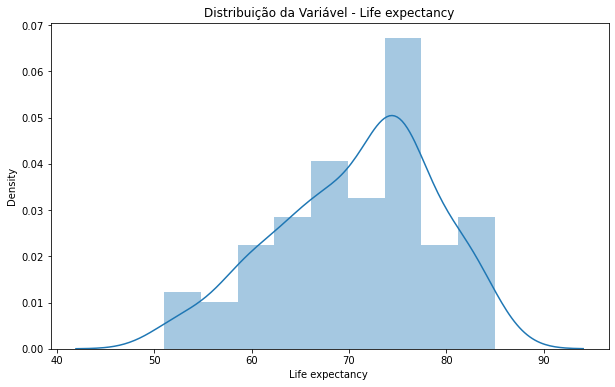

In [29]:
# Define as dimensões do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da variável resposta
sns.distplot(wle["Life expectancy "], kde=True)

# Define um título
plt.title('Distribuição da Variável - Life expectancy')

# Mostra o gráfico
plt.show()

In [30]:
# Separação dos dados em variáveis e resposta
X = wle.drop(['Country', 'Life expectancy '], axis = 1)
y = wle['Life expectancy ']

In [31]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [32]:
# Define como será feito a normalização
scaler = StandardScaler()

In [33]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [34]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [35]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [36]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [37]:
# Visualizando as predições
y_pred

array([74.39592391, 61.19256619, 64.77546596, 76.85974449, 73.89823835,
       69.39289574, 76.96791761, 74.90824316, 78.51686492, 53.7608554 ,
       68.40831893, 79.53280974, 66.47105004, 78.23831347, 79.15968654,
       64.61743761, 74.55486278, 71.94088802, 73.19816535, 65.92836932,
       75.98199682, 75.26176859, 76.5349554 , 81.07821522, 72.64110432,
       82.92854533, 81.45458323, 75.04008166, 79.785586  , 59.36907546,
       72.80448663, 80.66987197, 69.3229551 , 80.24734356, 53.27979668,
       80.50542856, 61.40647448, 74.95304588, 68.11726994])

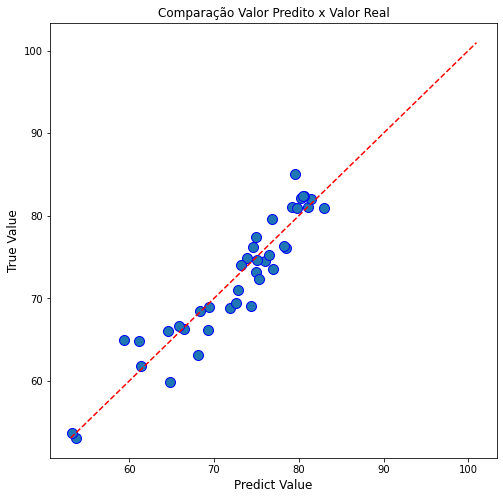

In [38]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [39]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    2.077
Erro Quadrãtico Médio:  6.737
R^2:                    0.89


In [40]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,infant deaths,9.216867
1,Income composition of resources,4.841601
2,Hepatitis B,1.412919
3,Polio,0.459447
4,Population,0.352322
5,percentage expenditure,0.088871
6,GDP,0.084396
7,thinness 5-9 years,-0.090846
8,BMI,-0.153307
9,Measles,-0.316705


## 

### Questão 3

O arquivo usa_housing.csv consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

- __Avg. Area Income:__ Média da renda dos residentes de onde a casa está localizada.
- __Avg. Area House Age:__ Média de idade das casas da mesma cidade.
- __Avg. Area Number of Rooms:__ Número médio de quartos para casas na mesma cidade.
- __Avg. Area Number of Bedrooms:__ Número médio de quartos para casas na mesma cidade.
- __Area Population:__ A população da cidade onde a casa está localizada.
- __Price:__ Preço de venda da casa.
- __Address:__ Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

### Resolução:

In [41]:
# Carrega a base de dados
houses = pd.read_csv('./usa_housing.csv')

In [42]:
# Print das primeras linhas do dataset
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [43]:
# Verifica as dimensões do dataframe
houses.shape

(5000, 7)

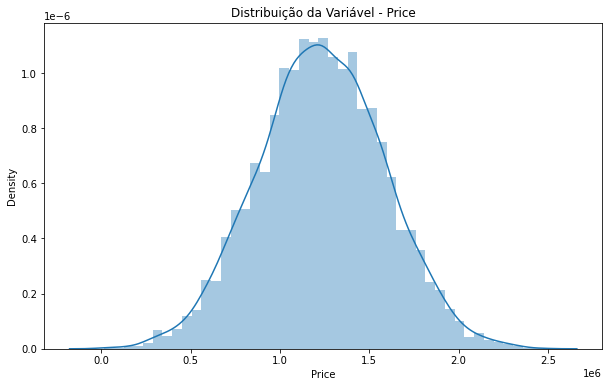

In [44]:
# Dimensiona o tamanho da figura
plt.figure(figsize=(10,6))

# Plot da distribuição da variável resposta
sns.distplot(houses["Price"], kde=True)

# Cria o titulo
plt.title('Distribuição da Variável - Price')

# Mostra o gráfico
plt.show()

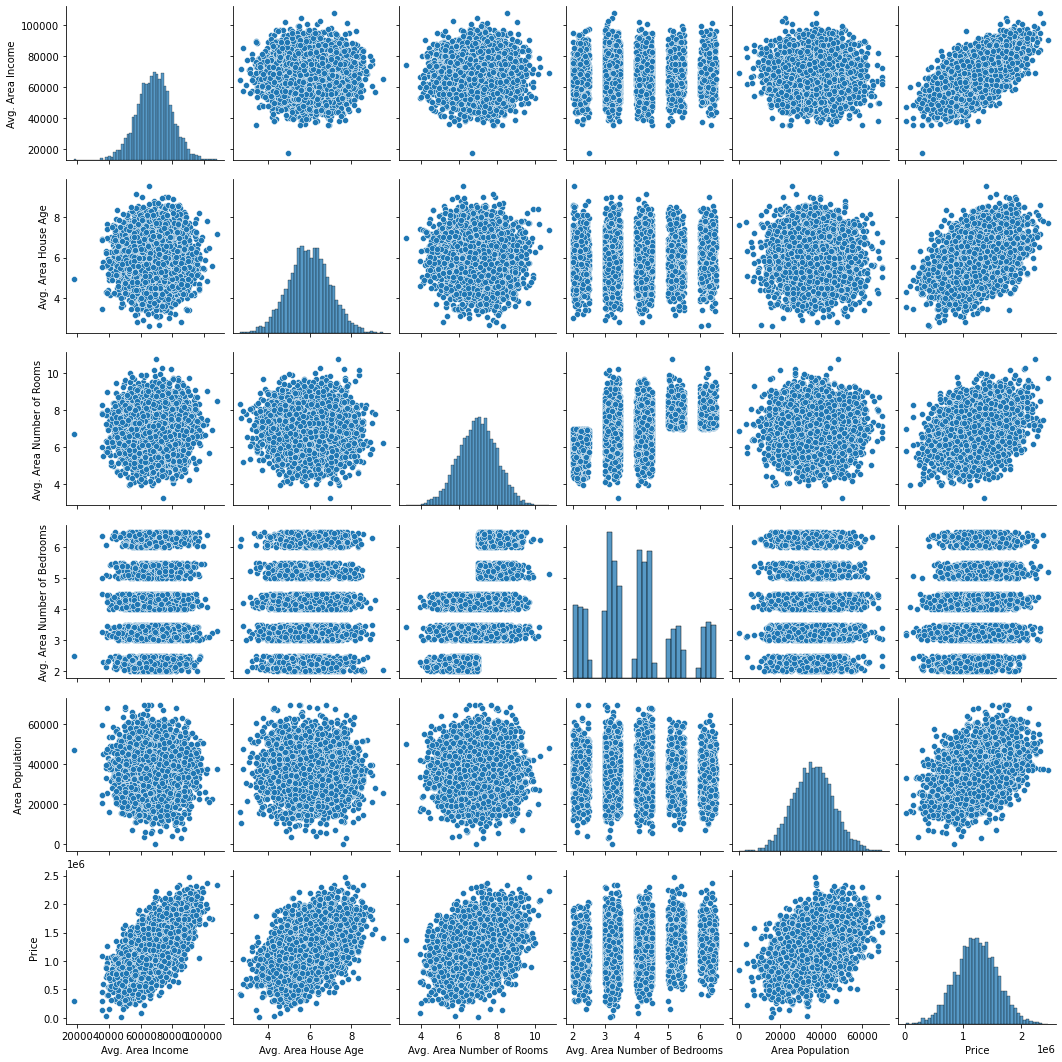

In [45]:
# Pairplot da variáveis
sns.pairplot(houses)

# Mostra o gráfico
plt.show()

In [46]:
# Separação entre variável e resposta
X = houses.drop(['Address', 'Price'], axis = 1)
y = houses['Price']

In [47]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [48]:
# Define como será feito a normalização
scaler = StandardScaler()

In [49]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [50]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [51]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [52]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [53]:
# Visualizando as predições
y_pred

array([1308536.13592601, 1237122.72746459, 1243835.62817083, ...,
       1457119.79297222, 1483428.953093  , 1047510.59737207])

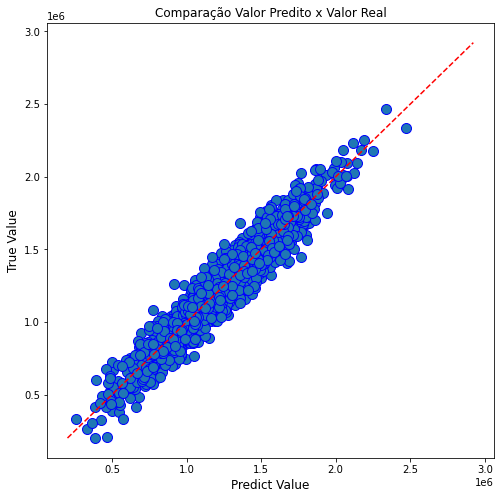

In [54]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [55]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    81135.566
Erro Quadrãtico Médio:  10068422551.401
R^2:                    0.915


In [56]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,Avg. Area Income,232679.724643
1,Avg. Area House Age,163841.046593
2,Area Population,151252.342377
3,Avg. Area Number of Rooms,121110.555478
4,Avg. Area Number of Bedrooms,2892.815119


## 

### Questão 4

Utilizando o dataset _insurance.csv_ sobre precificação de seguro saúde para clientes, crie um modelo de Regressão Linear para que seja feita essa precificação.

### Resolução:

In [57]:
insurance = pd.read_csv('insurance.csv')

In [58]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
insurance['sexo'] = np.where(insurance['sex'] == 'male', 1, 0)
insurance['fumante'] = np.where(insurance['smoker'] == 'yes', 1, 0)

In [61]:
insurance

,age,sex,bmi,children,smoker,region,charges,sexo,fumante
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [62]:
insurance.drop(['sex', 'smoker'], axis = 1, inplace = True)

In [63]:
insurance.head()

,age,bmi,children,region,charges,sexo,fumante
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [64]:
insurance_dummies = pd.get_dummies(insurance, 
                                   prefix_sep = '_', 
                                   columns = ['region'], 
                                   drop_first = True)

In [65]:
insurance_dummies

,age,bmi,children,charges,sexo,fumante,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [66]:
insurance.shape

(1338, 7)

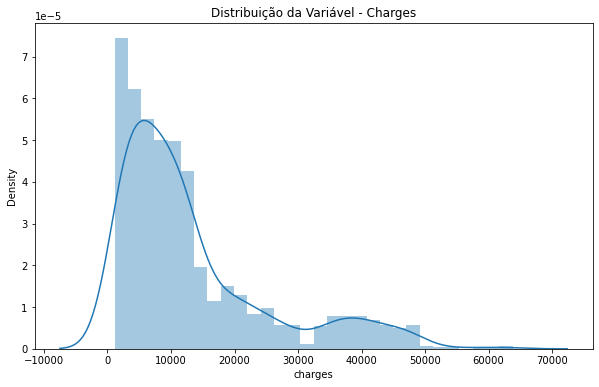

In [67]:
# Dimensiona a figura do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da resposta
sns.distplot(insurance_dummies["charges"], kde=True)

# Determina um titulo para o gráfico
plt.title('Distribuição da Variável - Charges')

# Mostra o Gráfico
plt.show()

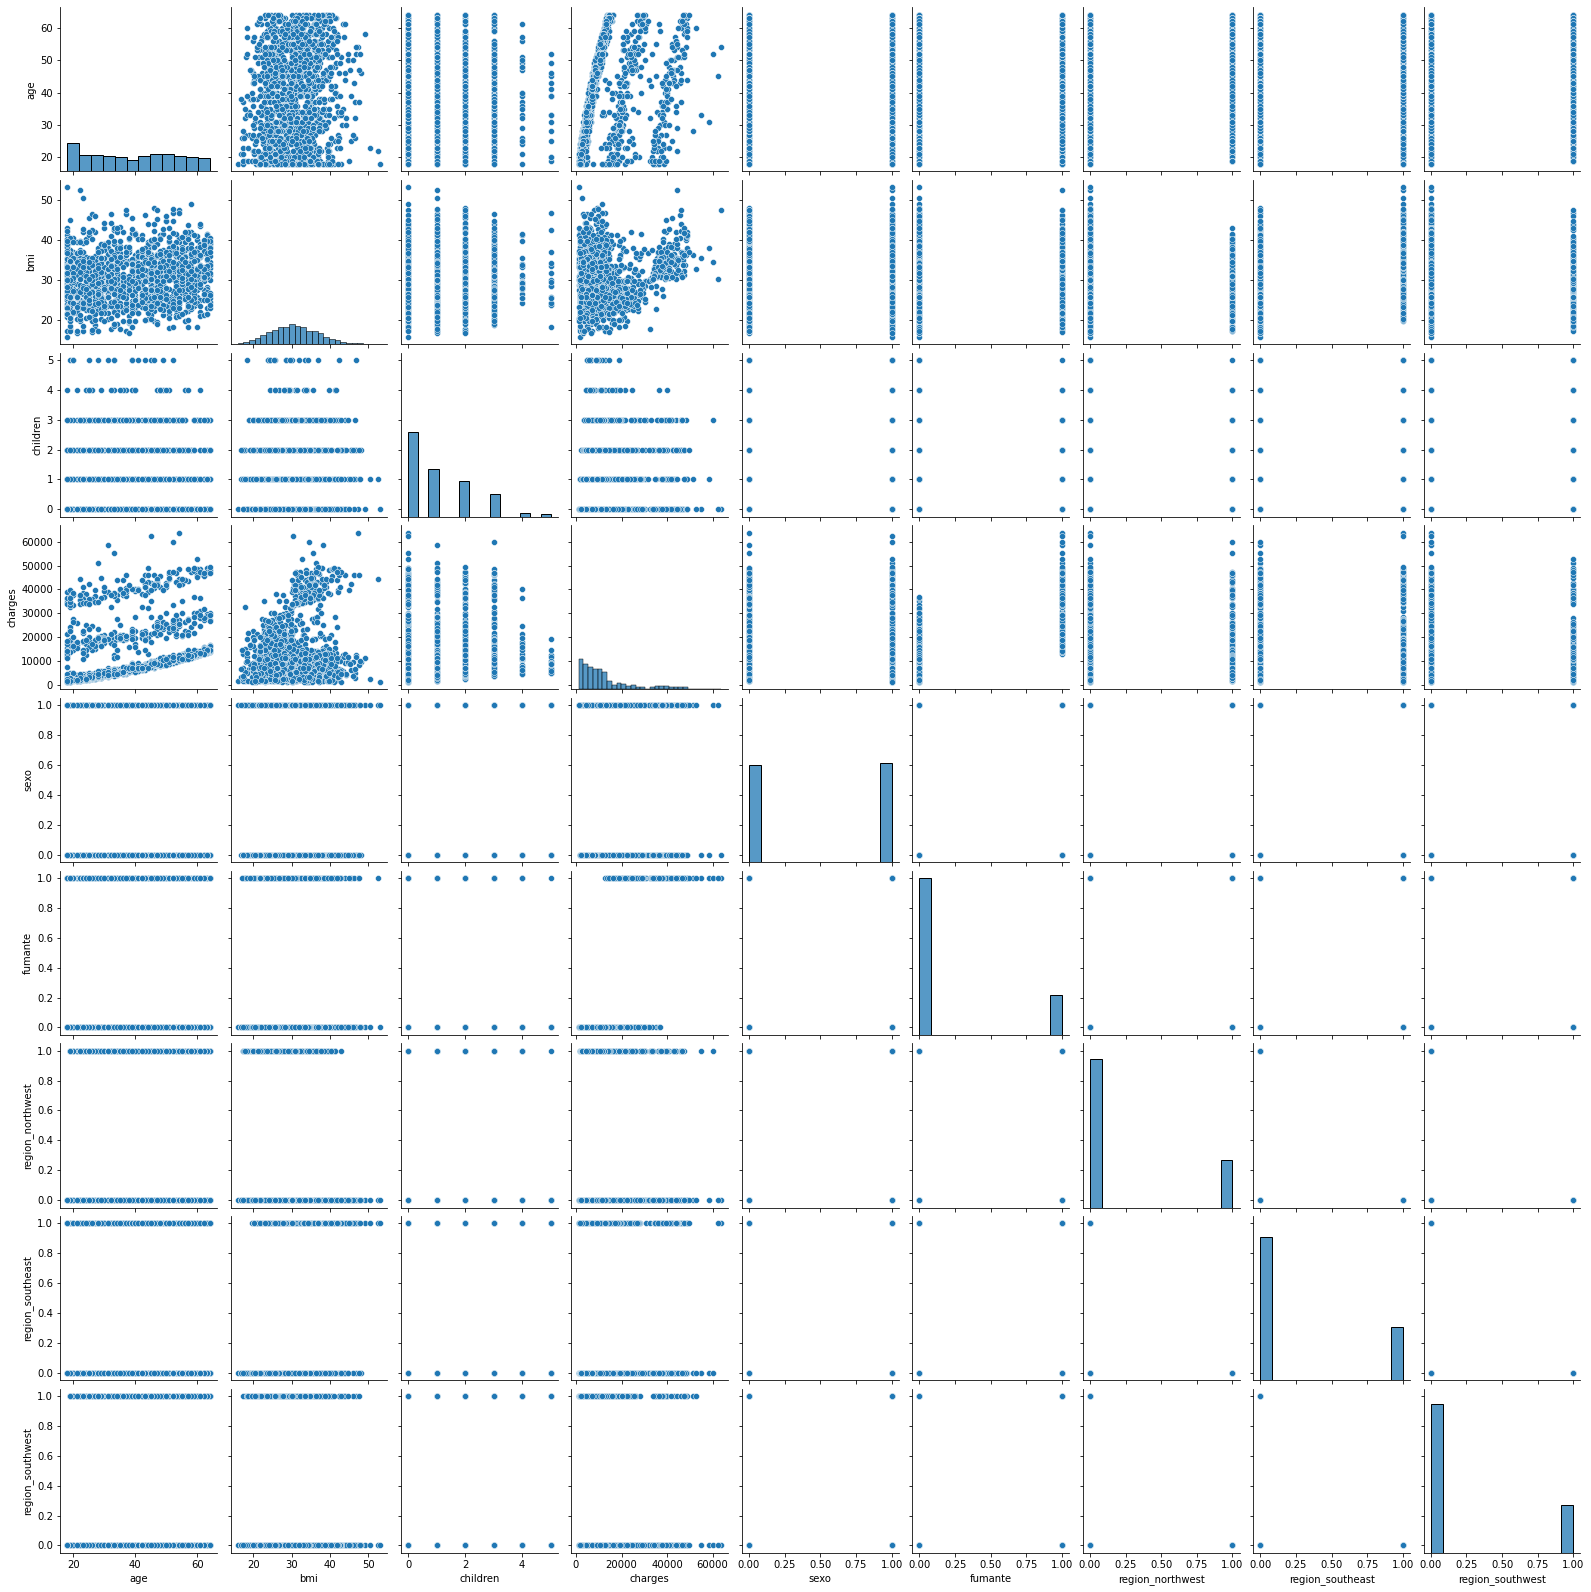

In [68]:
# Pairplot das Variáveis
sns.pairplot(insurance_dummies)

# Mostra o gráfico
plt.show()

In [69]:
# Separação dos dados entre variáveis e resposta
X = insurance_dummies.drop(['charges'], axis = 1)
y = insurance_dummies['charges']

In [70]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [71]:
# Define como será feito a normalização
scaler = StandardScaler()

In [72]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [73]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [74]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [75]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [76]:
# Visualizando as predições
y_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

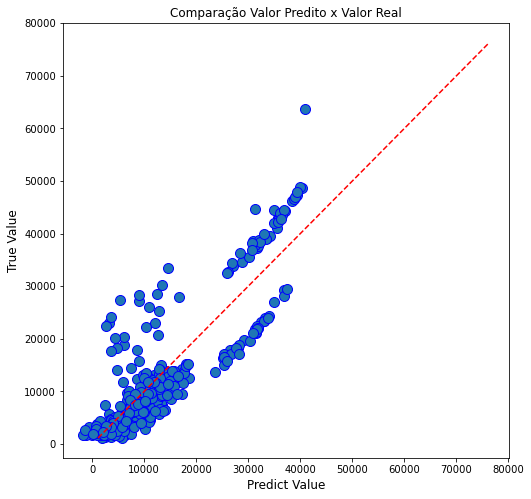

In [77]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [78]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    4145.451
Erro Quadrãtico Médio:  33780509.575
R^2:                    0.77


In [79]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,fumante,9595.868167
1,age,3688.583190
2,bmi,2090.997834
3,children,514.023604
4,sexo,52.388681
5,region_northwest,-209.325551
6,region_southwest,-394.014449
7,region_southeast,-426.262771


## 

### Questão 5
No _dataset_ _Admission_Predict.csv_, temos dados sobre alunos indianos que desejam ingressar em uma universidade e entre as variáveis existem diversas métricas de desempenho deles. Utilizando a variável resposta "Chance de Admissão" (Chance of admit ), crie um modelo de regressão linear para esses dados.

### Resolução:

In [80]:
# Carrega a base de dados
admit = pd.read_csv('Admission_Predict.csv', index_col = 'Serial No.')

In [81]:
# Plot das primeiras linhas
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [82]:
# Utilizando o .info() para ver as caracteristicas dos dados
admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [83]:
# Verifica os valores nulos
admit.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [84]:
# Verifica a dimensão dos dados
admit.shape

(400, 8)

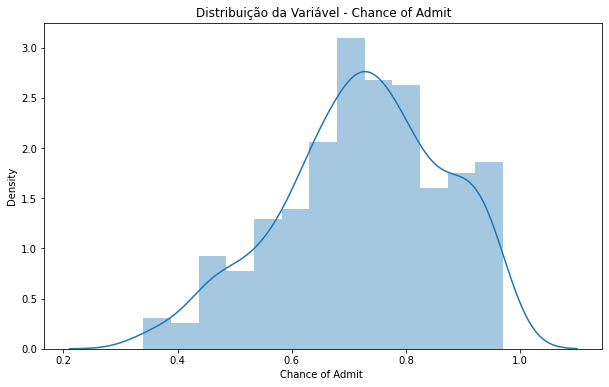

In [85]:
# Dimensiona a figura do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da variavel resposta
sns.distplot(admit["Chance of Admit "], kde=True)

# Cria um titulo
plt.title('Distribuição da Variável - Chance of Admit')

# Mostra o gráfico
plt.show()

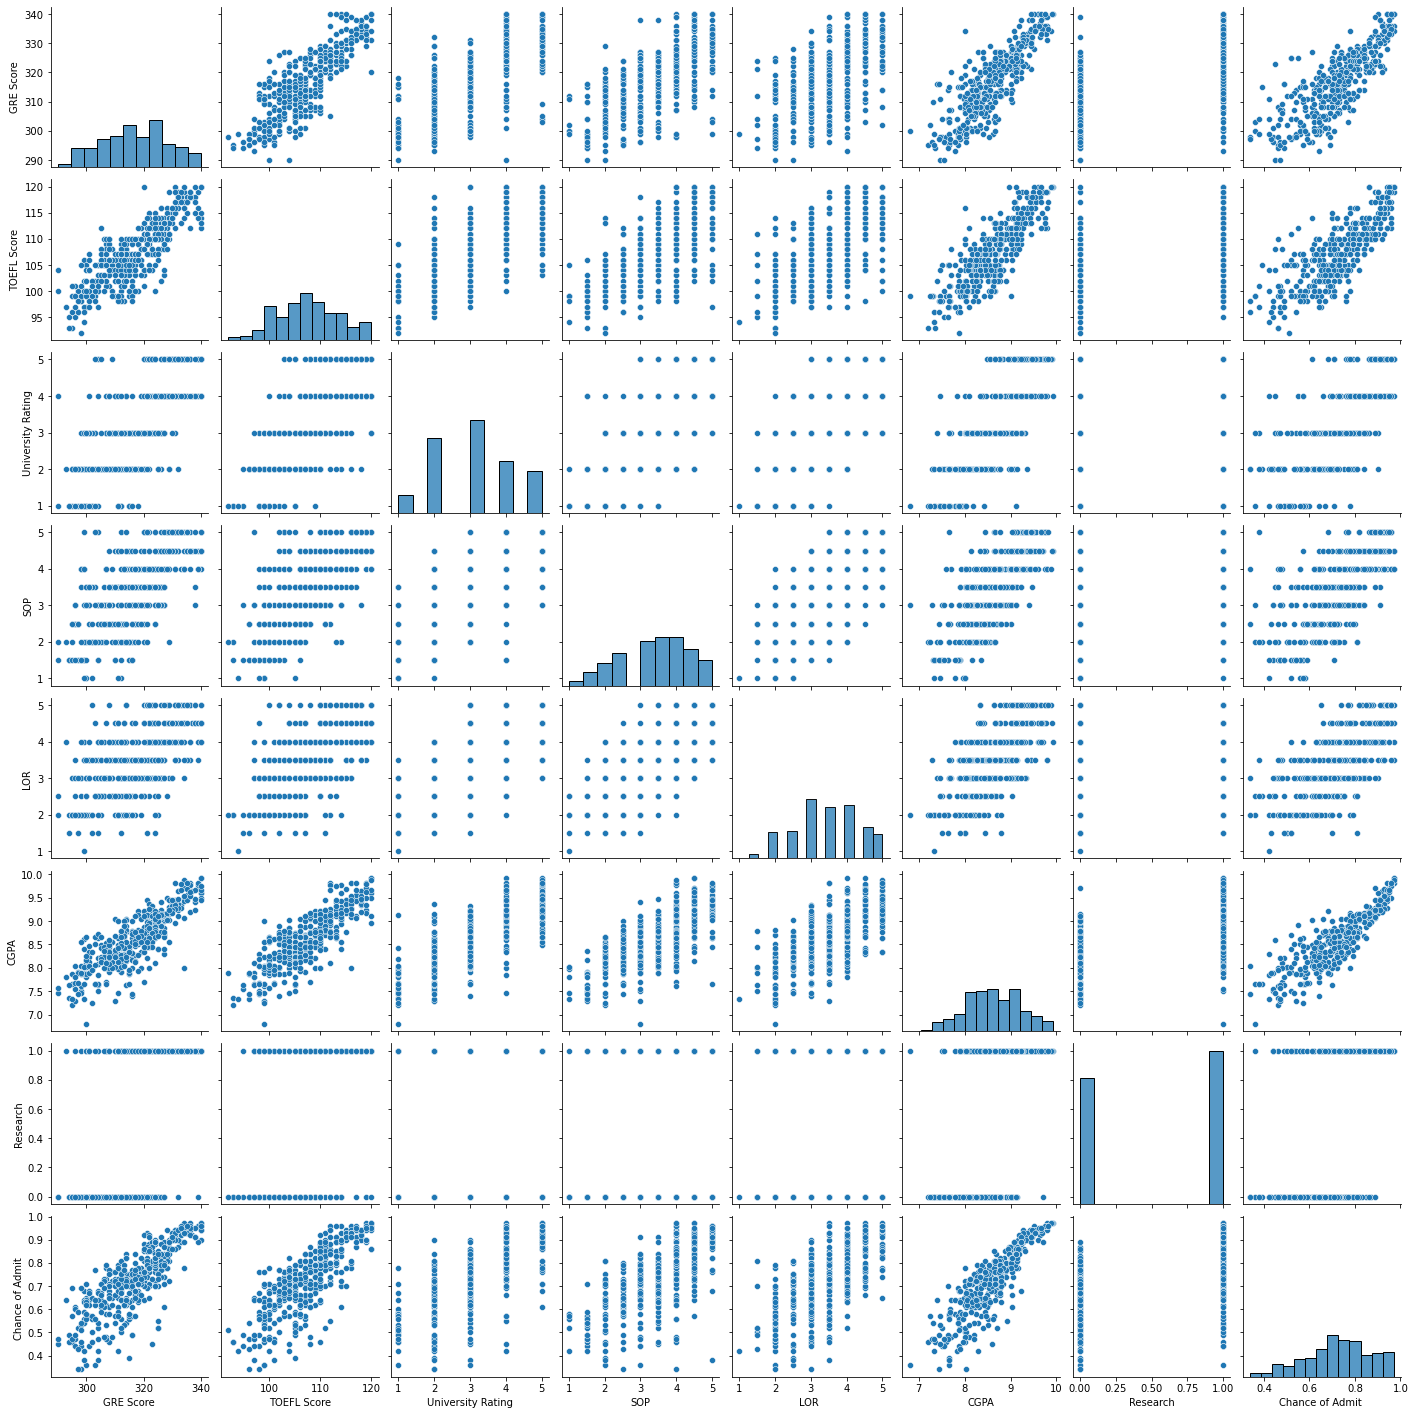

In [86]:
# Pairplot das Variáveis
sns.pairplot(admit)

# Mostrao gráfico
plt.show()

In [87]:
# Speração dos dados entre variáveis e resposta
X = admit.drop(['Chance of Admit '], axis = 1)
y = admit['Chance of Admit ']

In [88]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [89]:
# Define como será feito a normalização
scaler = StandardScaler()

In [90]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [91]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [92]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [93]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [94]:
# Visualizando as predições
y_pred

array([0.64734197, 0.72165881, 0.93540267, 0.82079041, 0.57781233,
       0.9282453 , 0.52898217, 0.54049852, 0.6642913 , 0.84453894,
       0.72491972, 0.91192259, 0.55014279, 0.88795065, 0.70151728,
       0.69045265, 0.66999264, 0.48163309, 0.69099994, 0.97632508,
       0.59207825, 0.65665649, 0.71377809, 0.53497985, 0.95093543,
       0.810305  , 0.69409622, 0.56684368, 0.67946535, 0.81457938,
       0.81022743, 0.94667098, 0.64560622, 0.51450621, 0.66361741,
       0.67144094, 0.7235074 , 0.6480692 , 0.61989951, 0.88414197,
       0.74108467, 0.59701292, 0.77704183, 0.96177165, 0.84899462,
       0.83589569, 0.95175439, 0.65471687, 0.92257385, 0.85934346,
       0.89351388, 0.72601699, 0.78377786, 0.95276909, 0.57555615,
       0.59192473, 0.69115154, 0.84305695, 0.60189253, 0.84517226,
       0.66665763, 0.65574046, 0.7006315 , 0.50851903, 0.63275593,
       0.71371096, 0.61905871, 0.84500458, 0.85769092, 0.79819613,
       0.72154137, 0.82117028, 0.87634528, 0.83168876, 0.52556

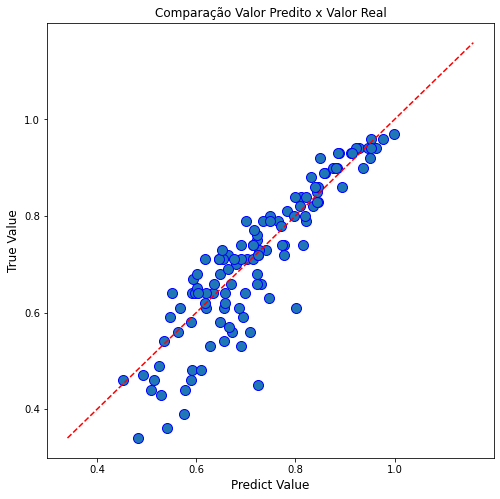

In [95]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [96]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.049
Erro Quadrãtico Médio:  0.005
R^2:                    0.796


In [97]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,CGPA,0.069904
1,GRE Score,0.020870
2,TOEFL Score,0.019058
3,LOR,0.012549
4,Research,0.009151
5,University Rating,0.005591
6,SOP,0.001019
